In [4]:
import pandas as pd
import numpy as np
from pandas import DataFrame
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)

In [5]:
df = pd.read_csv('C:/Users/kiril/Desktop/td/menu_train.csv')
df1 = pd.read_csv('C:/Users/kiril/Desktop/td/train1.csv')

In [6]:
rows = []
columns = ['chknum','person_id','month','day','good_id', 'menu']
#69576
for i in range(0,159229):
    array = np.unique(df[(df['day'] == df1['day'][i]) & (df['month'] == df1['month'][i])]['good_id'])
    row = [df1['chknum'][i], df1['person_id'][i], df1['month'][i], df1['day'][i], df1['good_id'][i], array[0]]
    rows.append(row)
    
test_with_menu = pd.DataFrame(rows, columns=columns)

In [7]:
count = len(df1['person_id'].unique()) # кол-во сотрудников 
df1.sort_values(['person_id','month','day'], ascending=True).head()

,Unnamed: 0,chknum,person_id,month,day,good_id
152341,152341,id938,0,1,17,"[182, 157, 180, 79, 2]"
75842,75842,id2495,0,1,18,"[170, 2, 227, 112, 169, 8]"
91386,91386,id3894,0,1,19,"[112, 271, 197, 145, 8, 8, 2]"
144297,144297,id8656,0,1,25,"[5, 6, 7, 8]"
1404,1404,id10126,0,1,26,"[9, 10, 8, 2, 85, 115, 15]"


In [8]:
df1.drop('Unnamed: 0',axis=1,inplace = True)

In [9]:
df1.head()

,chknum,person_id,month,day,good_id
0,id0,1,1,17,"[12, 13, 8, 124]"
1,id1,626,1,17,"[181, 46, 216, 124, 8]"
2,id10,1819,1,17,"[12, 240, 258, 13, 140, 2, 3, 3, 80, 180]"
3,id100,531,1,17,"[80, 85, 2, 216, 181, 157, 8]"
4,id1000,1743,1,17,"[216, 8, 85, 46, 159, 157]"


In [17]:
n = 3
a = df1['person_id'].value_counts()
a = a.sort_index(axis=0, ascending=True) # количество чеков сотрудником
k = a[a < n].index # id_person разовых покупателей

In [18]:
k

Int64Index([  18,   47,   85,   93,  103,  130,  143,  153,  164,  170,
            ...
            2571, 2650, 2682, 2701, 2702, 2703, 2714, 2734, 2735, 2741],
           dtype='int64', length=118)

In [ ]:
df1[np.isin(df1['person_id'],k)];

In [ ]:
#df1 = df1.drop(df1[np.isin(df1['person_id'],k)].index)

In [ ]:
df1.head()

In [12]:
b = pd.DataFrame(columns = ['chknum','count'])
b['count'] = df1['good_id'].value_counts().tolist()
b['chknum'] = df1['good_id'].value_counts().index
b# популярные чеки

,chknum,count
0,[8],1312
1,[2],657
2,"[8, 8]",556
3,[19],391
4,[288],245
5,[23],237
6,"[3, 3]",226
7,[39],213
8,[112],212
9,[118],202


In [60]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141097 entries, 0 to 141096
Data columns (total 2 columns):
chknum    141097 non-null object
count     141097 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


In [61]:
b.head()

,chknum,count
0,[8],1312
1,[2],657
2,"[8, 8]",556
3,[19],391
4,[288],245


In [13]:
a = df1['person_id'].value_counts()
a = a.sort_index(axis=0, ascending=True) # количество чеков сотрудником
c = np.sort(pd.unique(df1['person_id']))
st = np.zeros(2742)
for i in range(0,159229):
    st[df1['person_id'][i]]= st[df1['person_id'][i]] + df1['good_id'][i].count(" ", 0, len(df1['good_id'][i]))
    if (df1['good_id'][i].count(" ", 0, len(df1['good_id'][i])) != 0):
                        st[df1['person_id'][i]] = st[df1['person_id'][i]] + 1  

rows = []
columns = ['person_id','count_chknum','count_good', 'mean_good_in_chknum']
#69576
for i in range(0,2742):
    if (st[i] != 0):
        row = [i, a[i], st[i], st[i]/a[i]]
        rows.append(row)
    
info_train = pd.DataFrame(rows, columns=columns)
info_train

,person_id,count_chknum,count_good,mean_good_in_chknum
0,0,85,597.0,7.023529
1,1,86,348.0,4.046512
2,2,107,535.0,5.000000
3,3,86,462.0,5.372093
4,4,41,216.0,5.268293
5,5,94,516.0,5.489362
6,6,7,36.0,5.142857
7,7,85,495.0,5.823529
8,8,75,389.0,5.186667
9,9,98,603.0,6.153061


In [55]:
info_train['count_good'] = info_train['count_good'].astype(int)

In [58]:
info_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2604 entries, 0 to 2603
Data columns (total 4 columns):
person_id              2604 non-null int64
count_chknum           2604 non-null int64
count_good             2604 non-null int32
mean_good_in_chknum    2604 non-null float64
dtypes: float64(1), int32(1), int64(2)
memory usage: 71.2 KB


In [20]:
#стек блюд каждого person_id
data = pd.read_csv('C:/Users/kiril/Desktop/td/info_train.csv')

In [21]:
def listfromstr(stroka):
    return np.fromstring(stroka[1:len(stroka)-1:1], dtype=int, sep=',')

In [22]:
df = pd.read_csv('C:/Users/kiril/Desktop/td/train_with_menu.csv')
rows =[]
for j in range(0,2742):
    row =[]
    for i in df[df['person_id'] == j]['good_id']:
        row = set(listfromstr(i)).union(row)
    if (len(df[df['person_id'] == j]['good_id']) != 0):
        rows.append(list(row))

In [23]:
len(rows)

2604

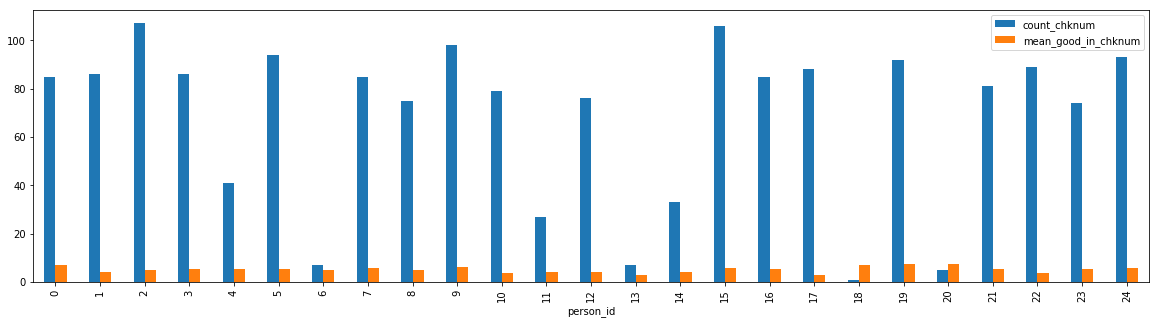

In [24]:
data[data['person_id'] < 25].groupby(['person_id'])['count_chknum','mean_good_in_chknum'].mean().plot(kind='bar')

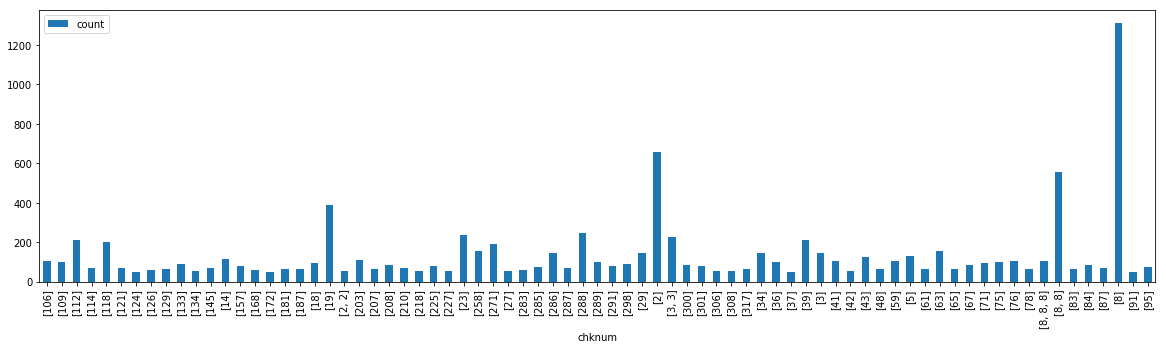

In [25]:
b[b['count'] > 50].groupby(['chknum']).mean().plot(kind='bar')

In [26]:
data = pd.read_csv('C:/Users/kiril/Desktop/td/train.csv')
data[data['good_id'] == 44]['good'];

In [28]:
data.to_csv(r'C:/Users/kiril/Desktop/td/data.csv',index=False)

# Популярные блюда

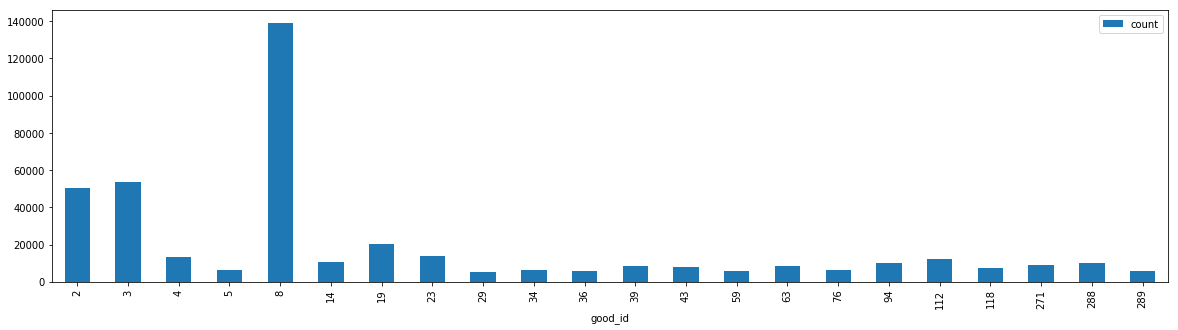

In [29]:
df = pd.read_csv('C:/Users/kiril/Desktop/td/train.csv')
popular = pd.DataFrame()
popular['good_id'] = df['good_id'].value_counts().index
popular['count'] = df['good_id'].value_counts().tolist()
popular[popular['count'] > 5000].groupby(['good_id']).mean().plot(kind='bar')

In [59]:
popular.head()

,good_id,count
0,8,139066
1,3,53473
2,2,50323
3,19,20133
4,23,13752


In [38]:
popular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 2 columns):
good_id    480 non-null int64
count      480 non-null int64
dtypes: int64(2)
memory usage: 7.5 KB


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
df = pd.read_csv('C:/Users/kiril/Desktop/td/train1.csv')
count_vect = CountVectorizer(token_pattern=r'\d+')
some = count_vect.fit_transform(df["good_id"].tolist())
new_df = pd.DataFrame(data=some.A, index=df['person_id'], columns=count_vect.get_feature_names())

In [31]:
new_df[new_df.index == 1]['124']

person_id
1    1
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    1
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    1
1    0
1    0
1    0
    ..
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    0
1    1
1    0
1    0
1    0
1    0
Name: 124, Length: 86, dtype: int64

In [32]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159229 entries, 1 to 1920
Columns: 480 entries, 0 to 99
dtypes: int64(480)
memory usage: 584.3 MB


In [33]:
new_df.head()

,0,1,10,100,101,102,103,104,105,106,...,90,91,92,93,94,95,96,97,98,99
person_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
626,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1819,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
531,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
